In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from collections import defaultdict
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import pandas as pd
import imutils
from skimage.feature import hog
from skimage import data, exposure

In [2]:
img = sorted(os.listdir("train"))
train_mask = sorted(os.listdir("train_mask"))
test_images = sorted(os.listdir("test"))
images = defaultdict(list)

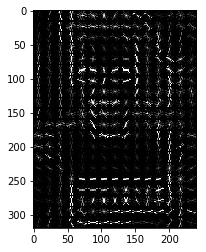

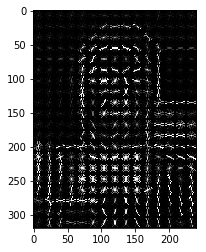

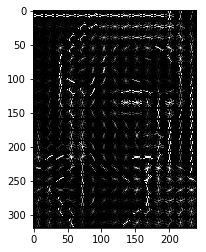

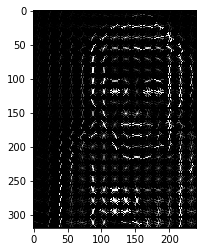

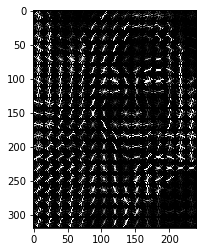

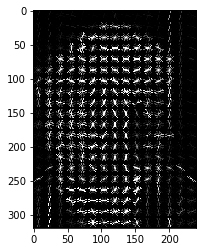

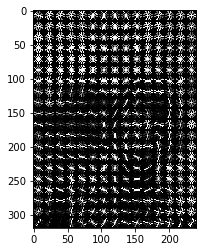

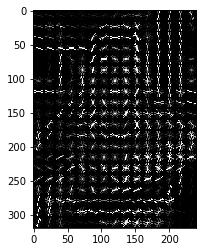

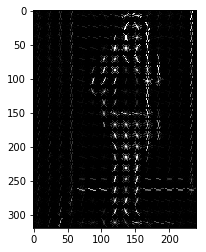

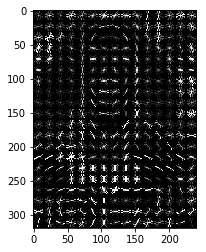

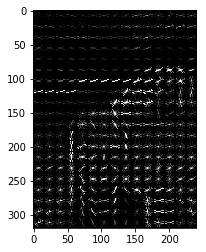

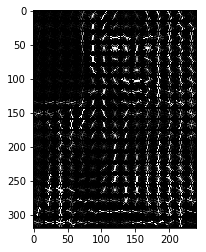

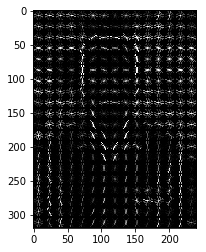

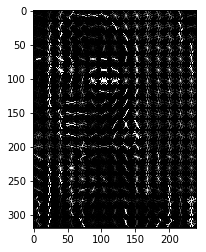

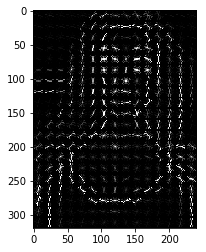

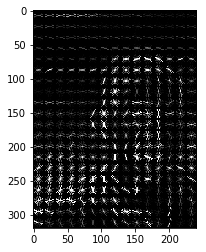

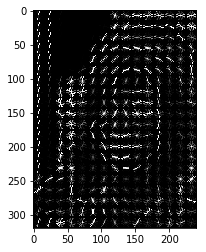

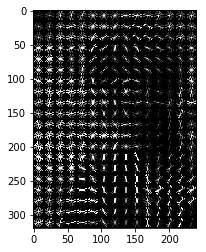

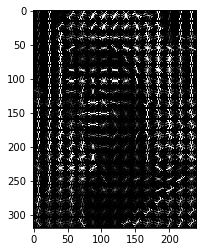

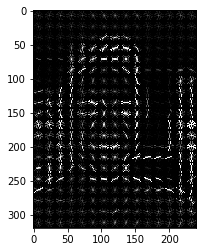

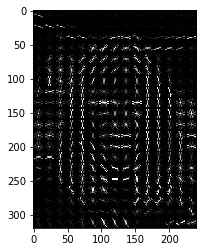

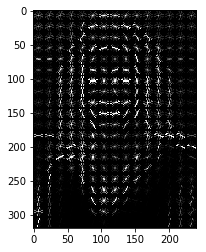

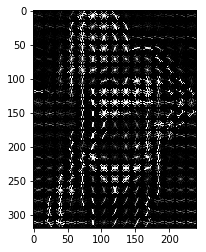

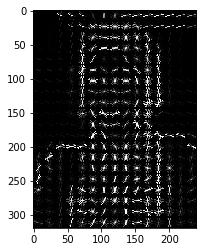

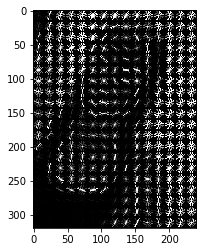

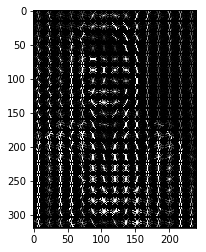

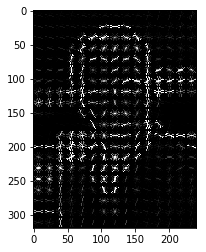

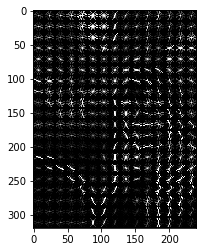

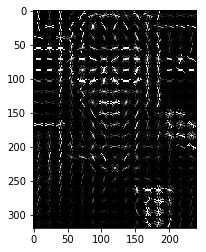

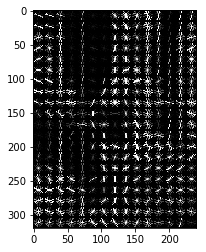

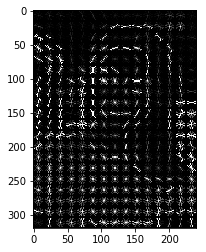

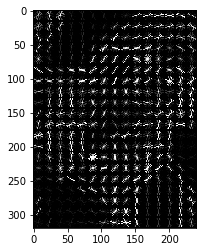

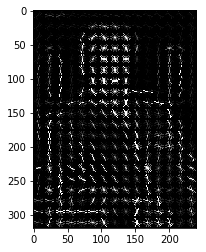

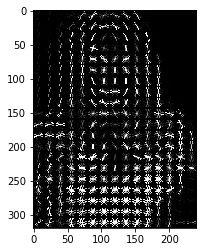

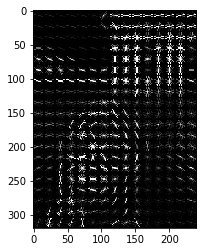

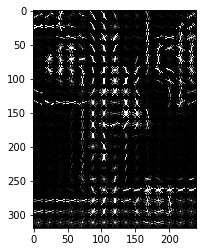

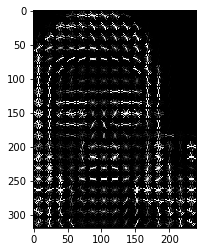

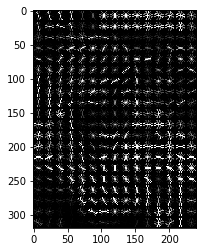

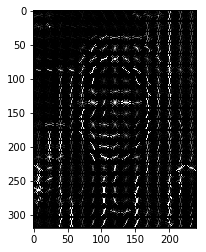

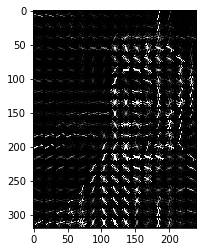

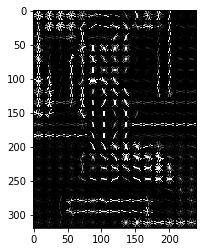

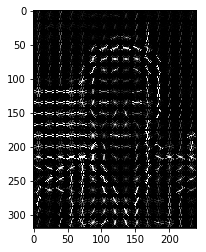

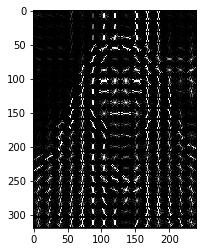

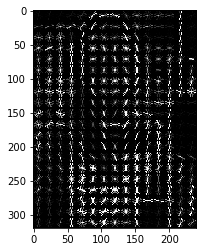

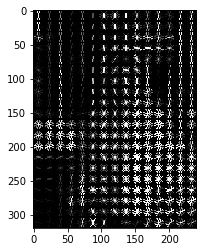

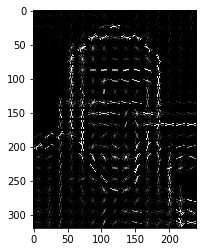

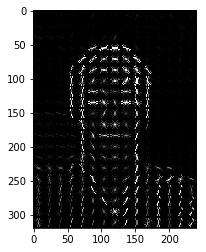

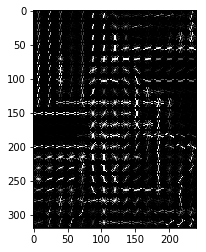

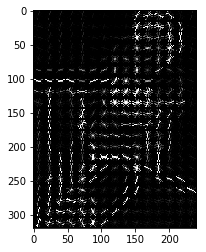

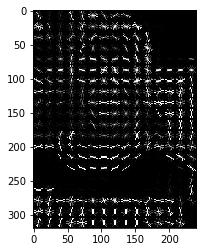

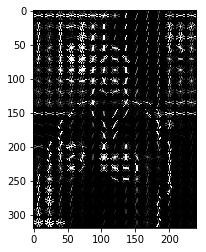

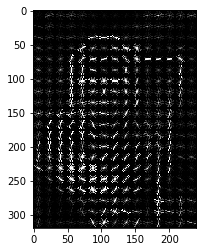

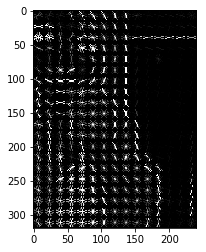

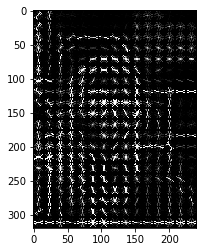

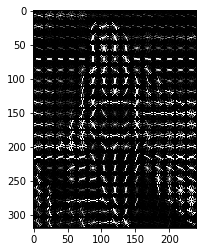

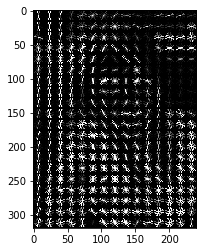

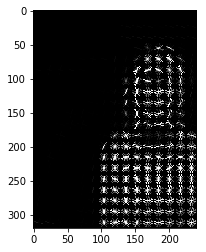

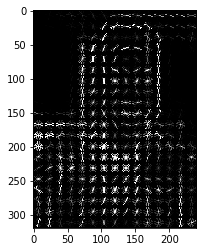

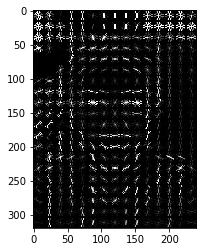

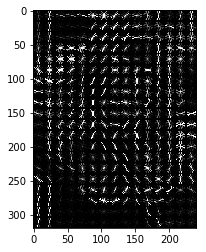

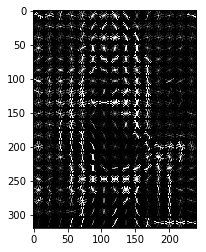

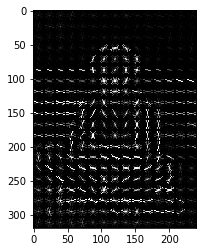

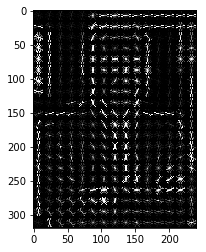

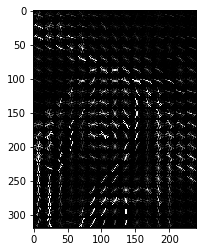

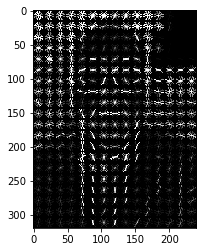

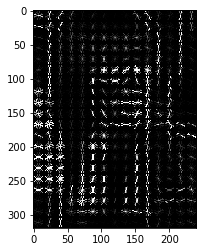

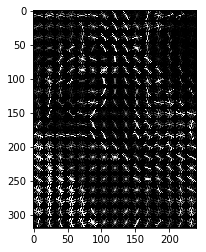

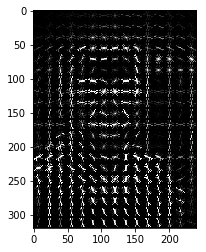

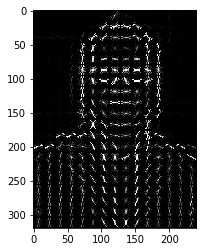

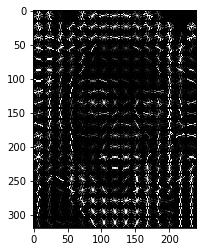

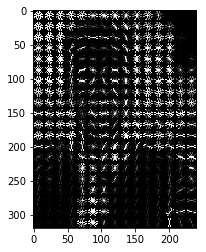

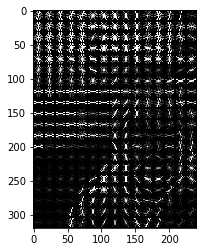

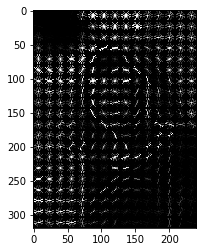

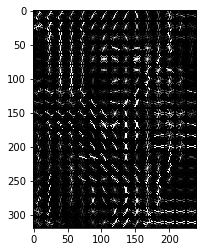

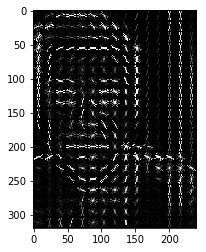

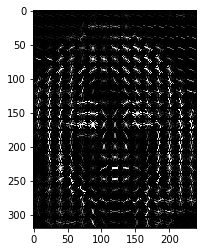

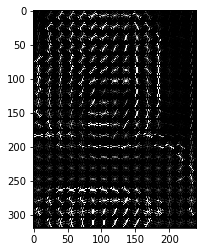

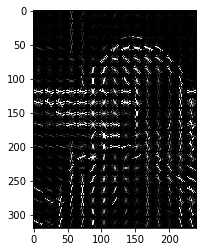

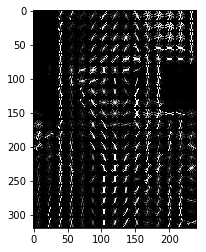

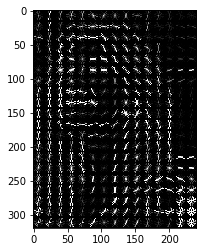

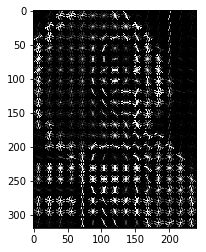

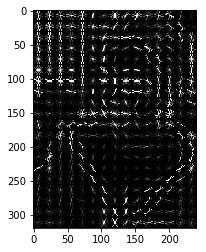

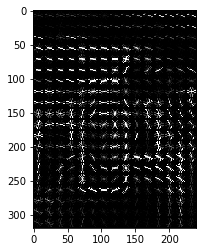

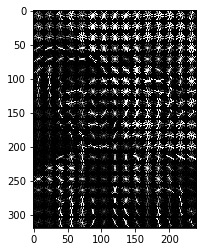

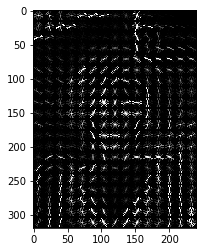

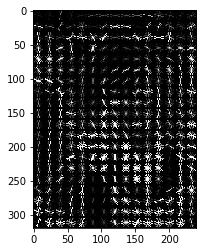

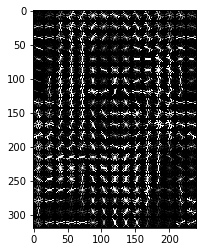

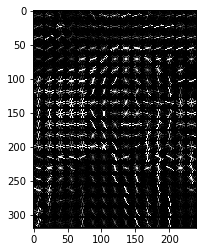

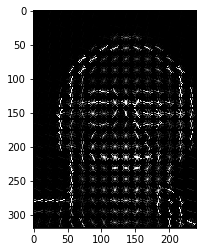

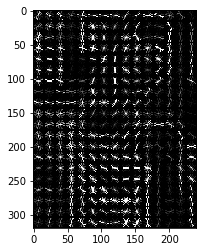

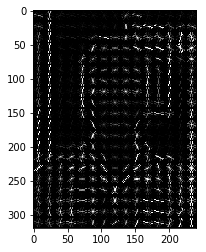

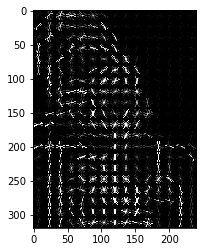

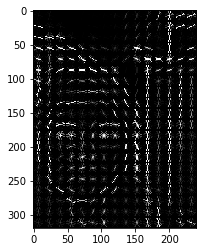

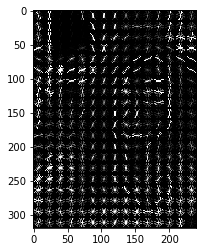

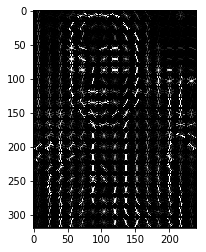

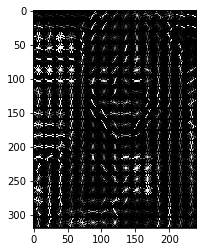

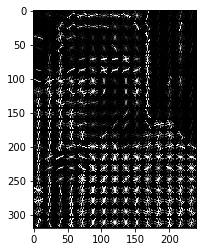

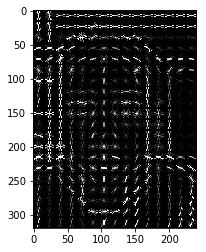

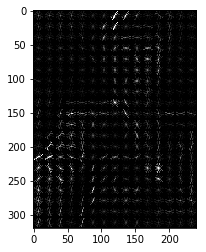

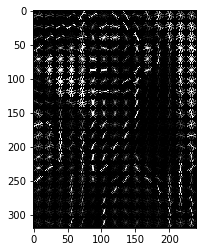

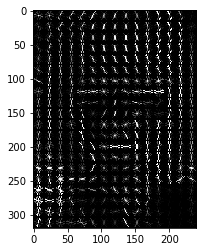

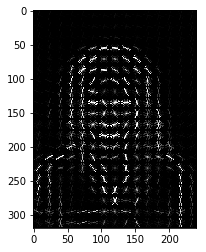

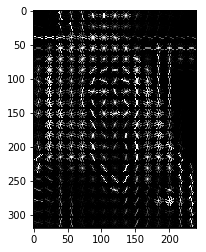

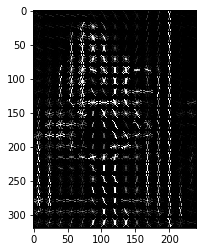

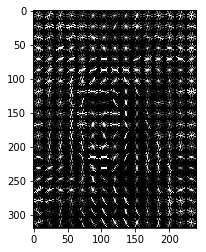

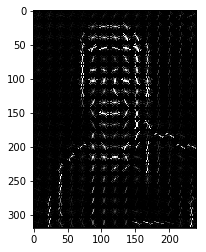

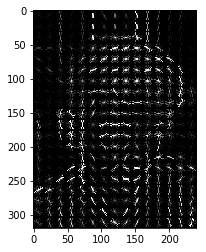

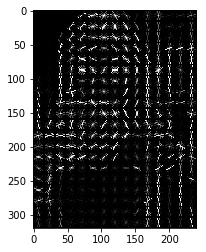

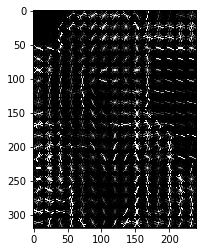

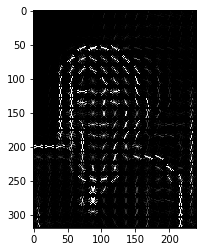

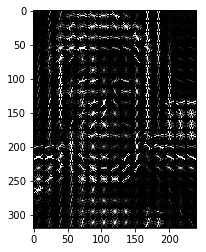

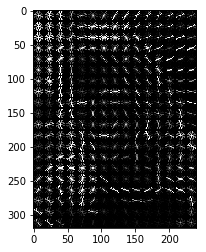

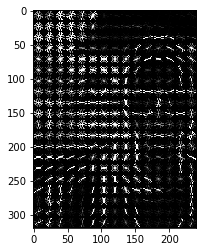

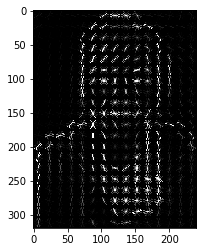

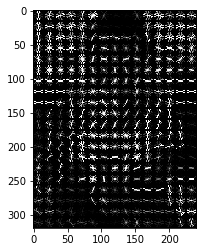

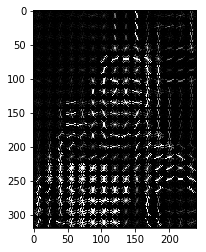

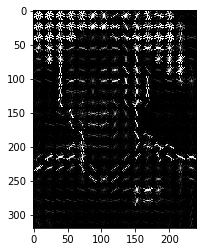

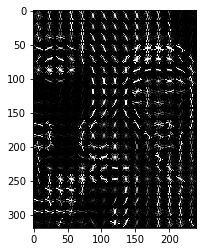

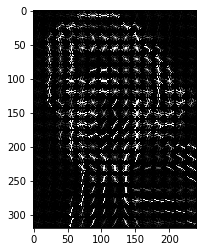

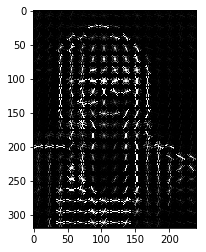

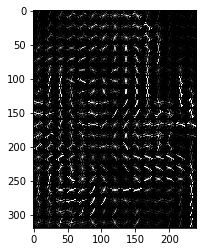

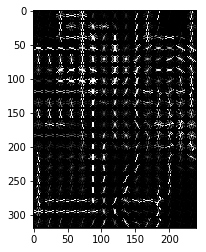

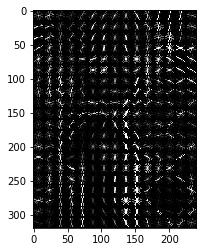

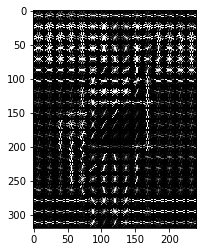

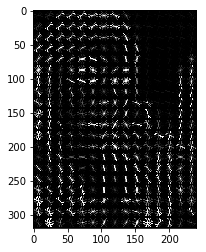

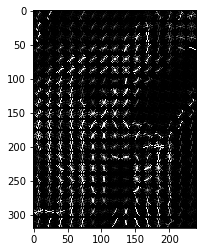

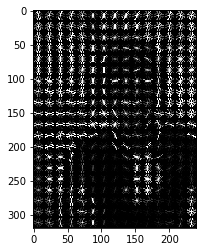

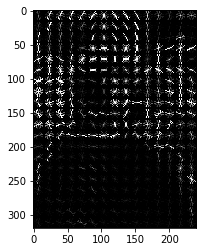

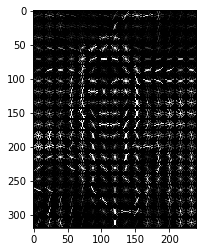

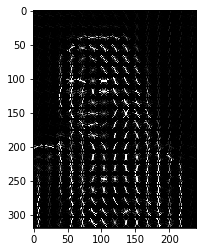

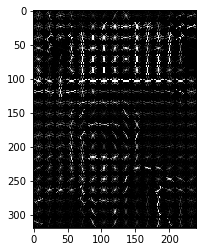

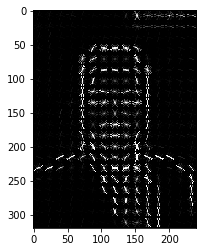

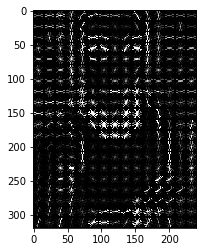

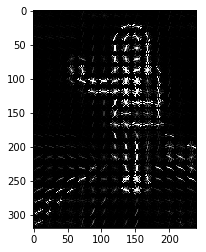

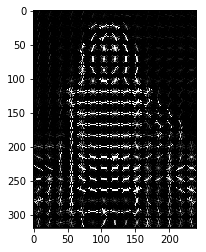

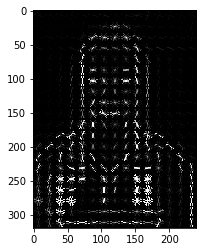

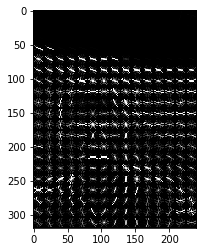

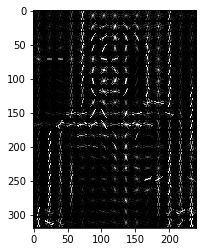

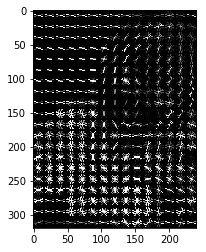

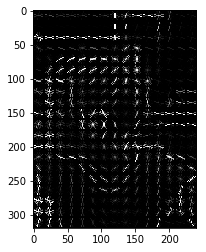

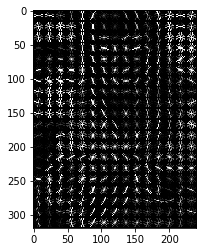

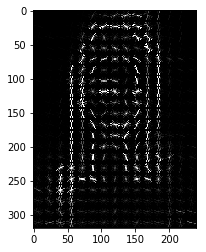

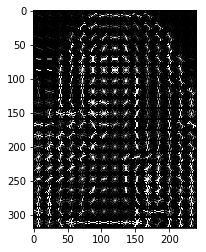

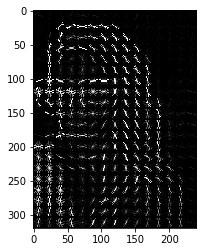

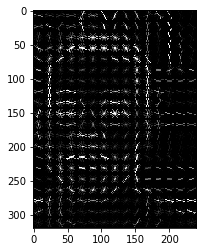

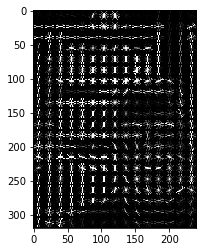

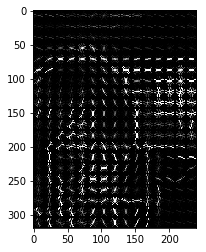

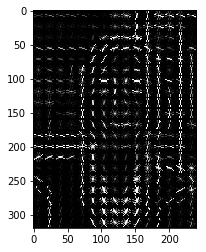

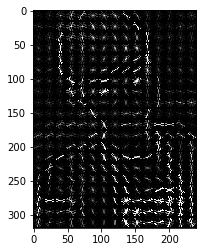

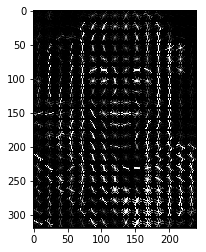

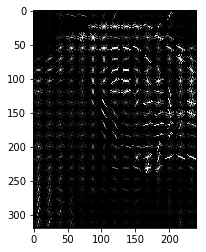

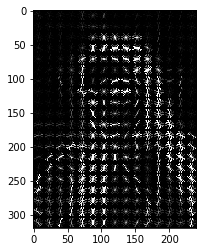

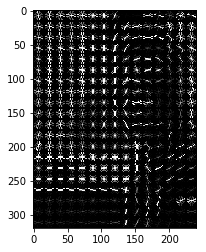

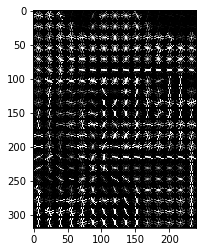

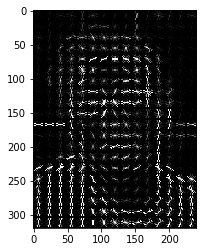

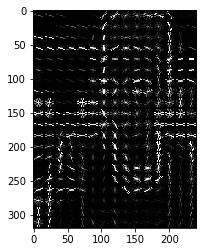

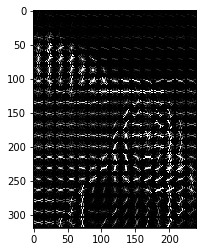

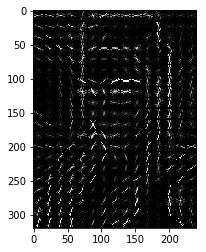

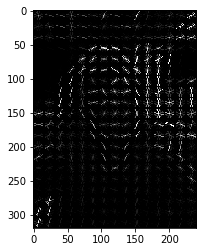

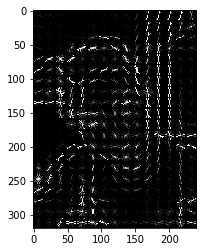

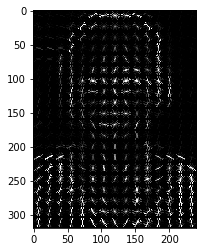

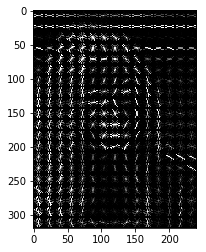

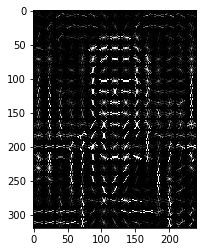

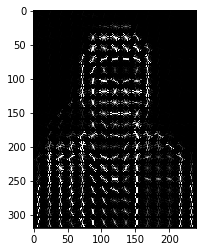

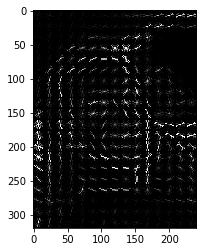

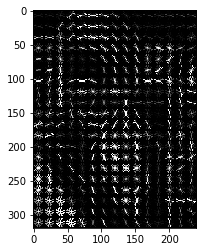

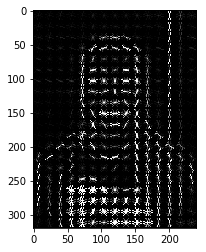

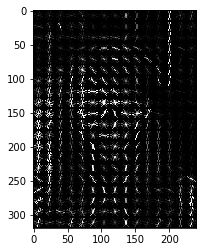

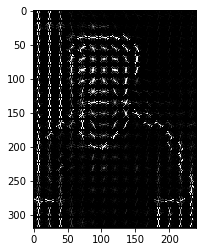

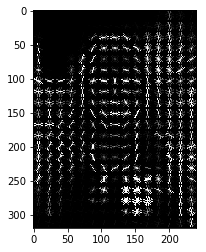

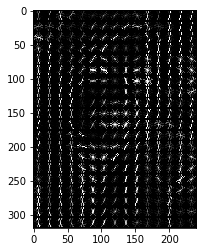

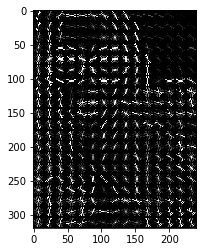

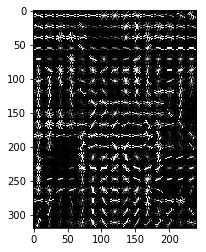

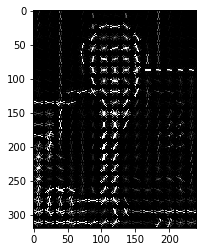

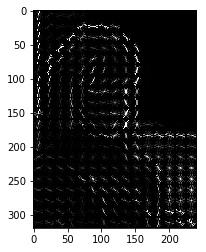

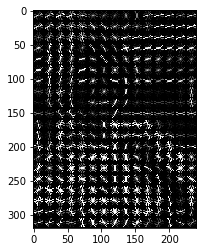

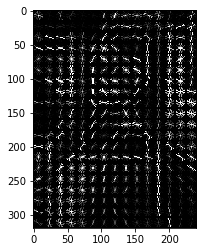

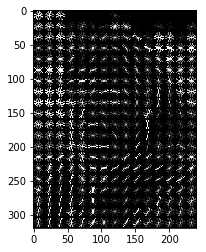

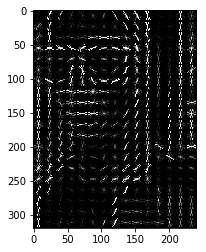

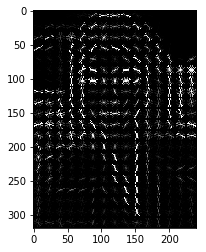

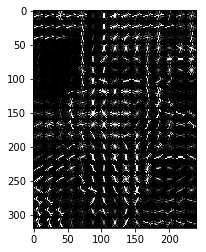

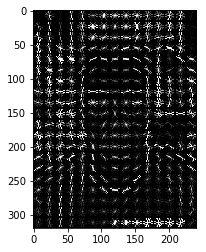

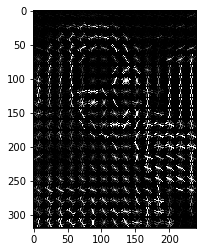

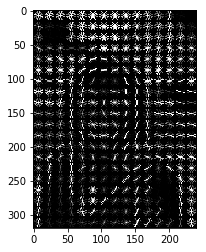

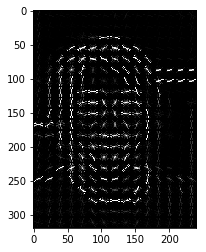

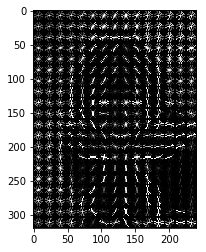

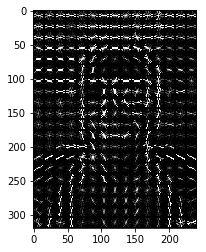

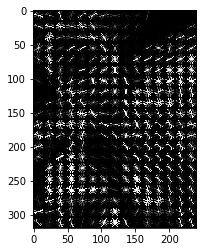

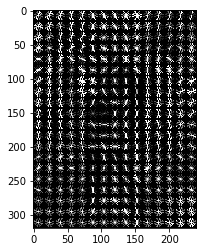

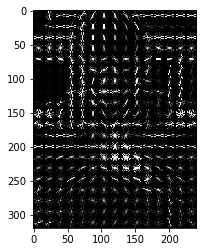

In [10]:
for i in img[0:190]:
    
    train = cv2.imread("train/{}".format(i))
    fd, hog_image = hog(train, orientations=8, pixels_per_cell=(16, 16),cells_per_block=(1, 1),block_norm='L2-Hys', visualize=True, multichannel=True)
    hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))
    plt.imshow(hog_image_rescaled, cmap=plt.cm.gray)
    plt.show()
    images['train_images'].append(hog_image_rescaled.ravel())

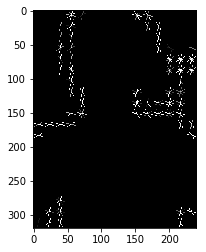

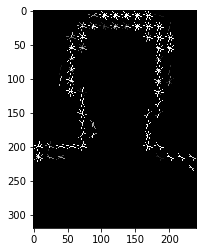

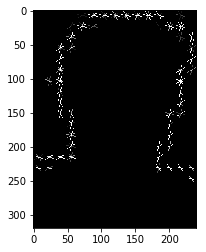

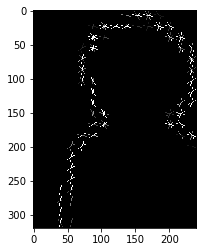

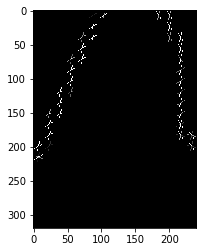

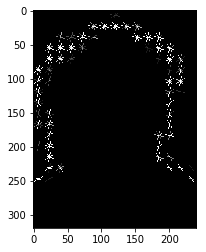

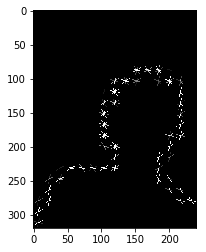

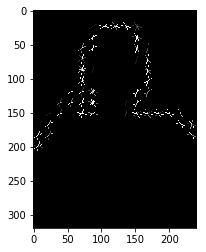

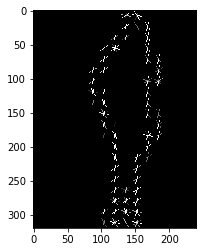

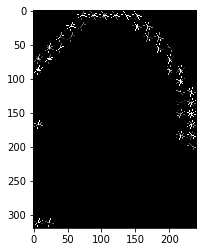

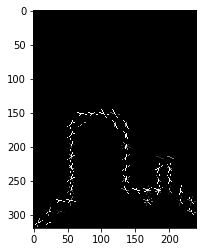

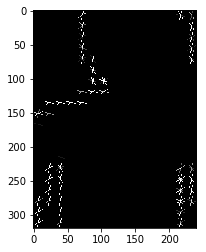

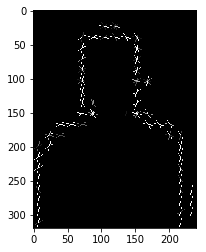

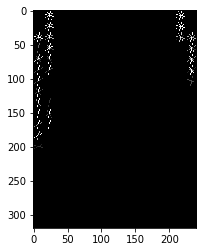

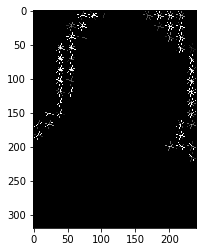

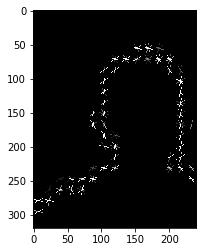

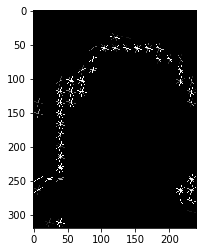

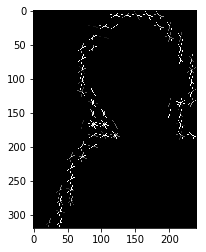

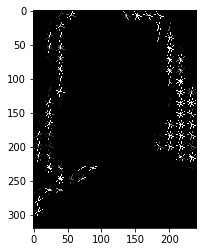

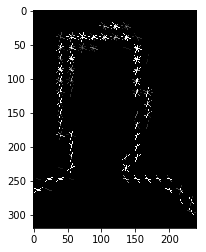

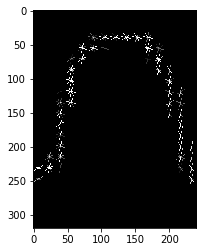

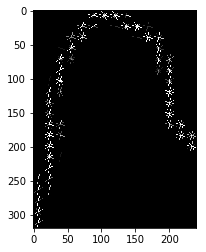

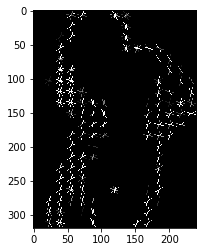

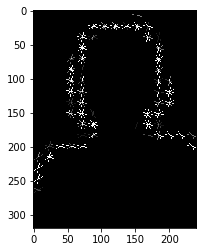

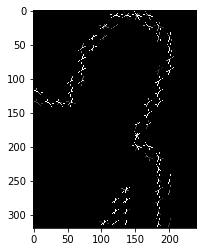

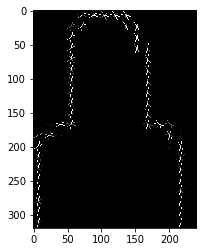

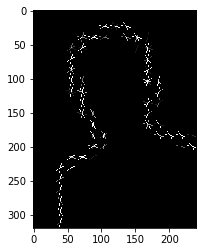

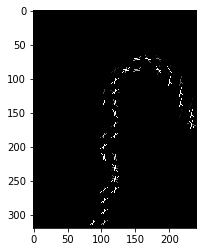

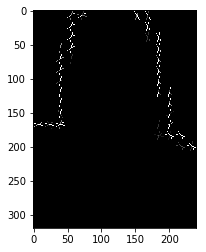

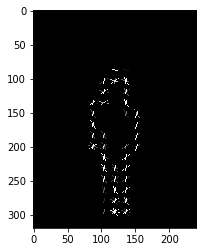

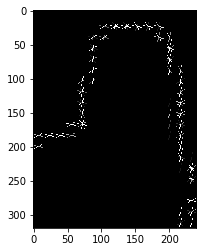

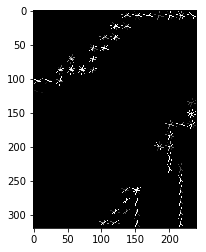

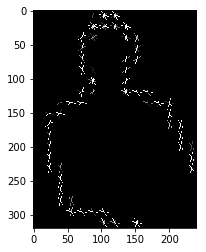

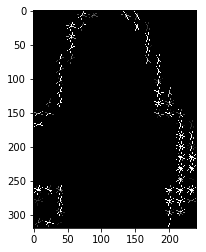

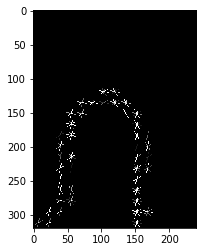

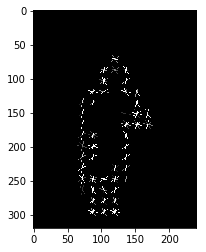

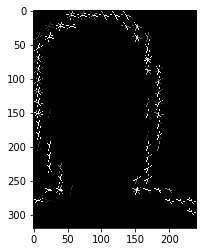

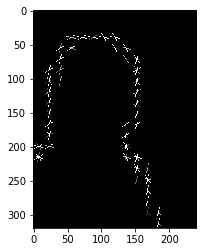

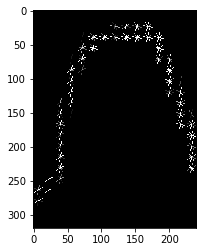

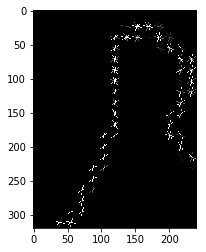

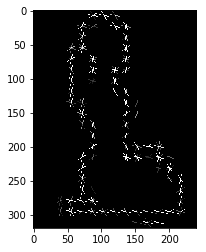

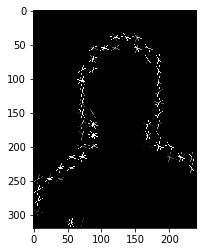

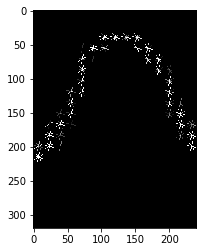

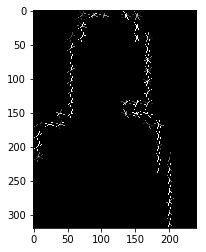

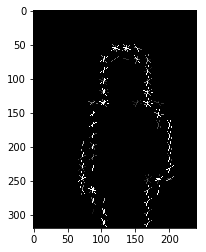

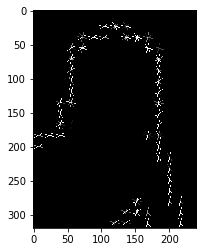

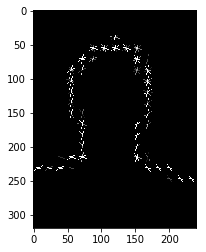

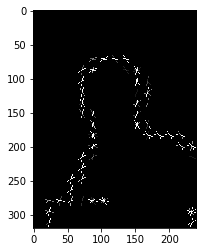

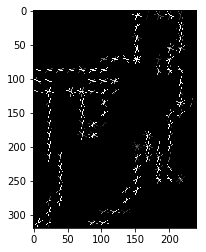

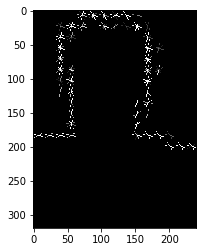

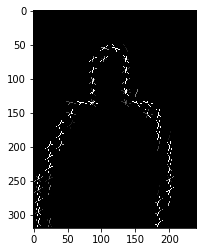

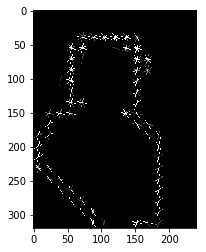

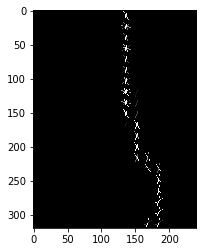

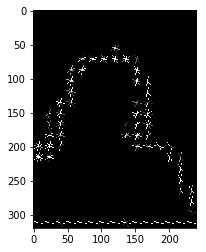

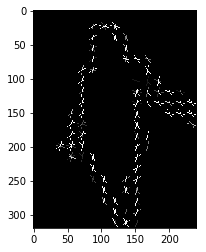

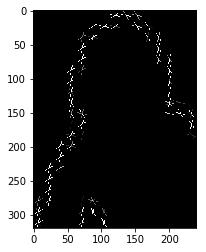

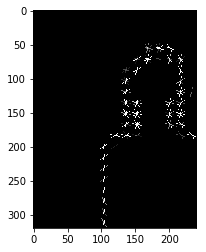

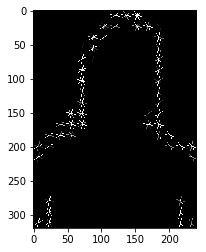

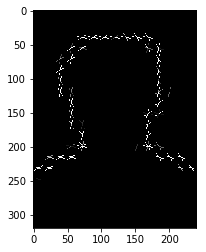

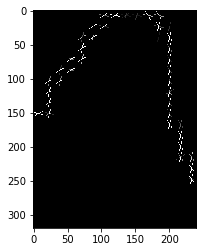

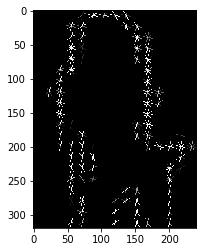

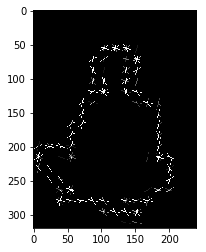

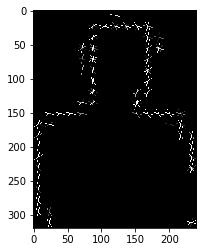

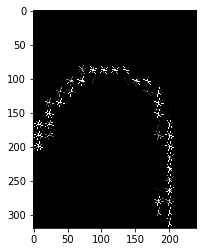

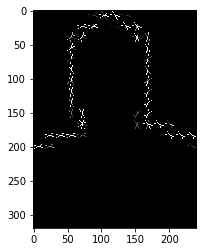

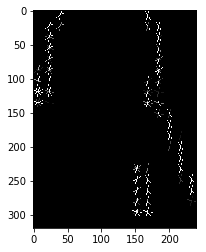

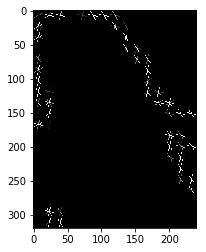

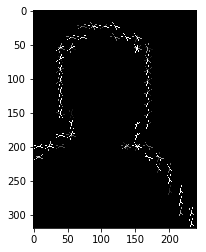

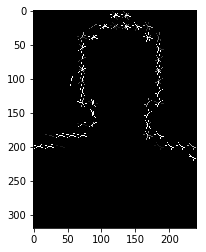

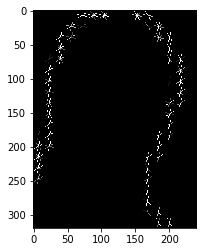

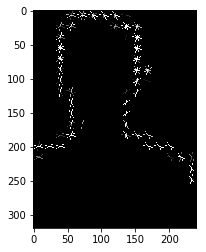

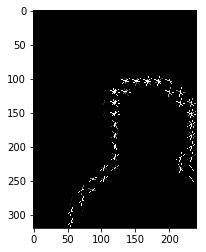

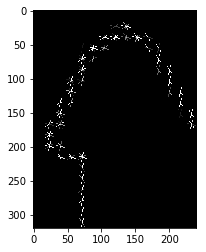

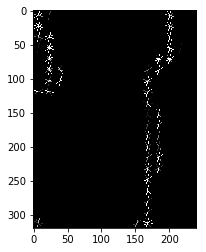

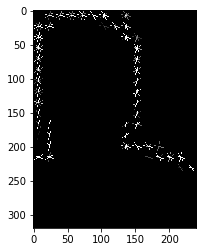

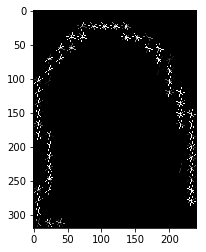

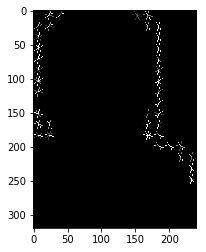

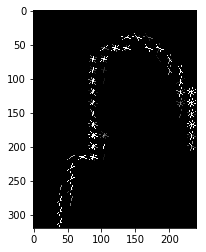

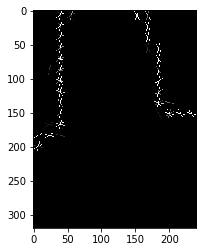

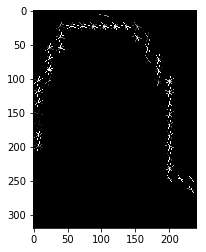

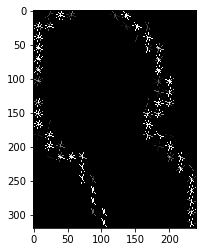

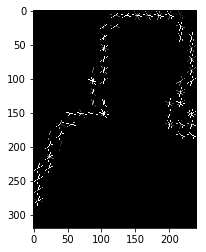

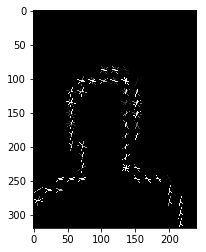

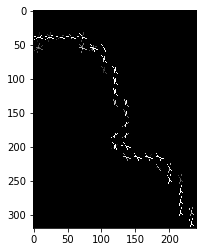

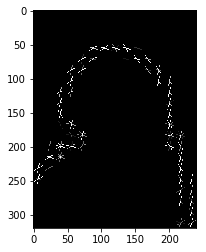

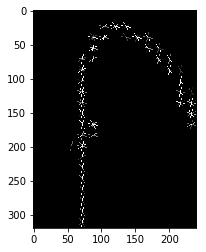

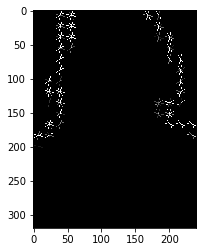

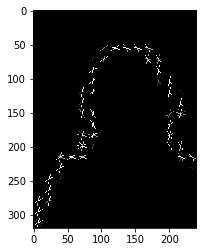

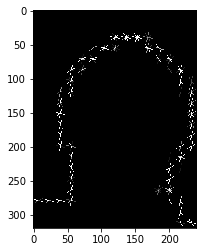

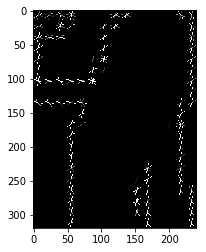

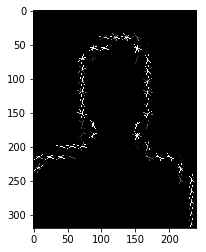

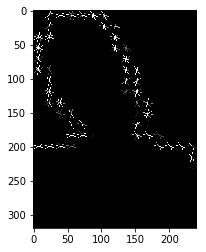

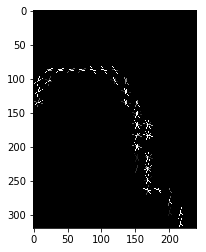

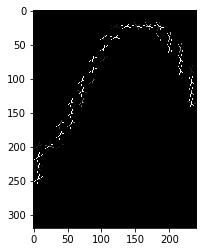

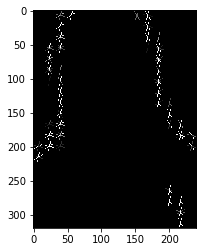

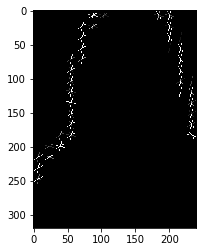

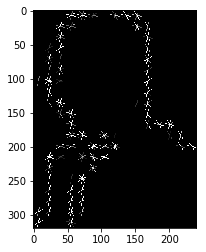

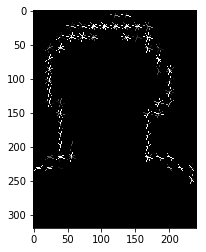

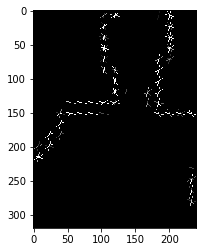

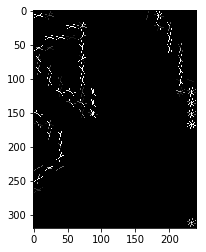

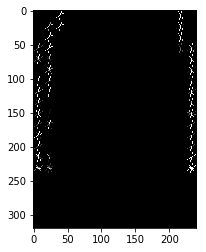

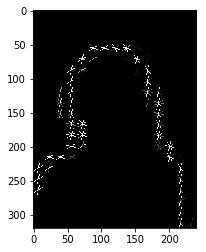

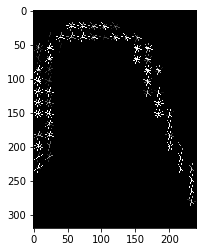

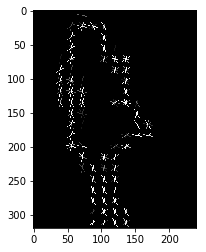

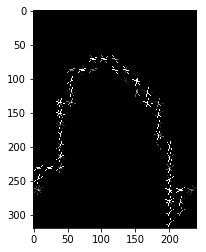

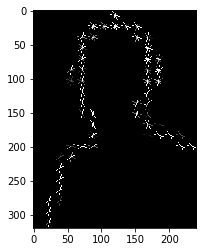

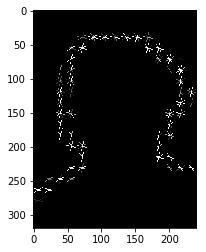

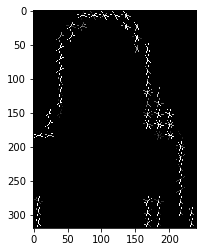

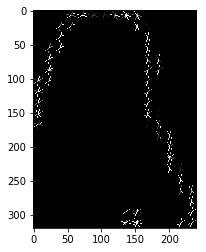

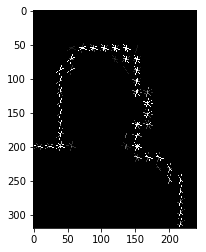

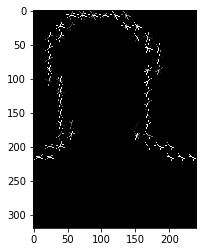

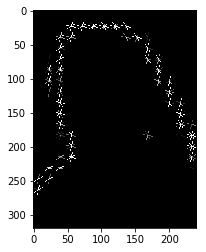

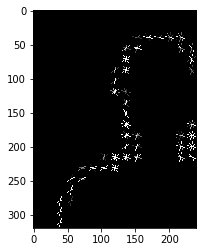

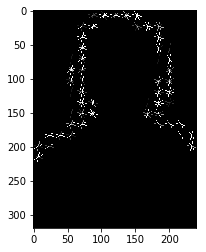

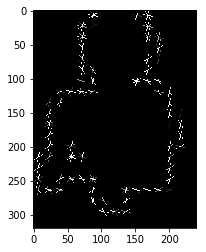

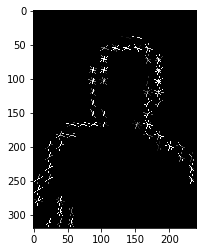

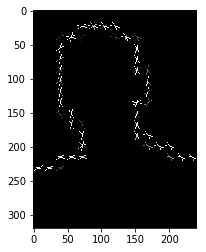

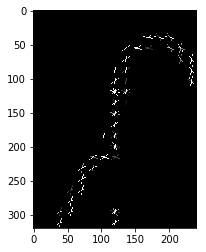

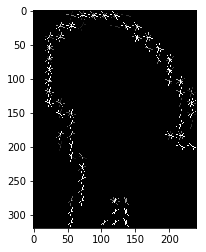

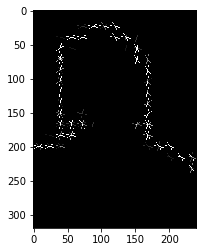

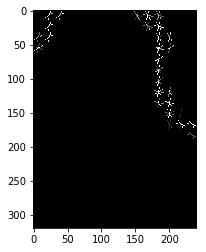

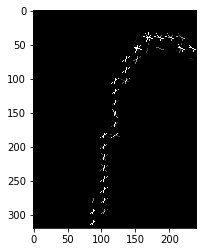

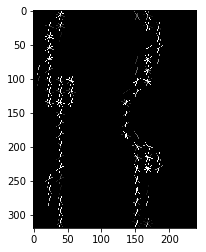

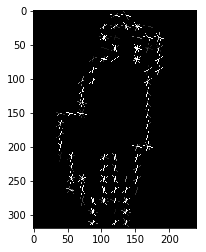

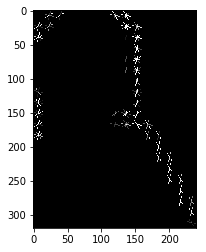

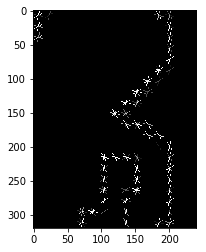

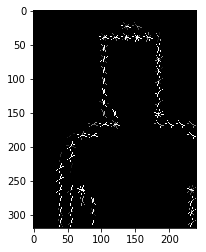

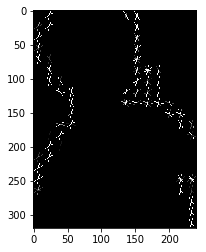

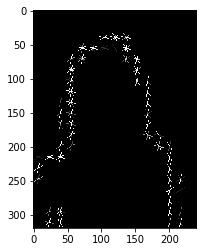

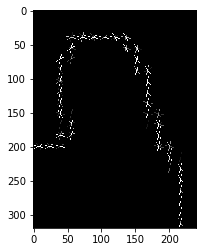

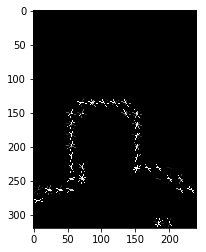

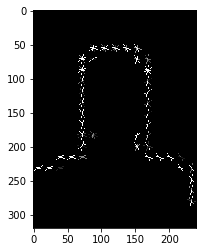

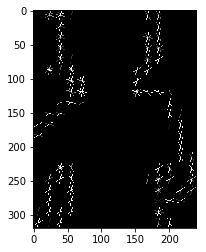

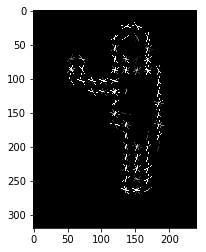

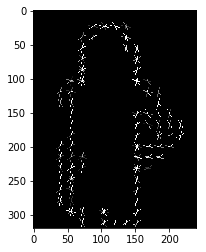

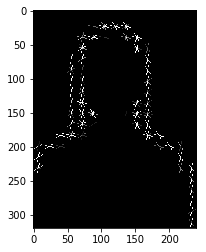

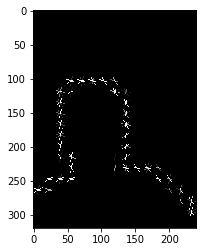

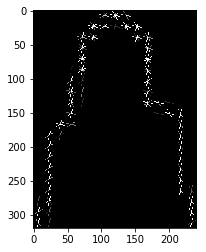

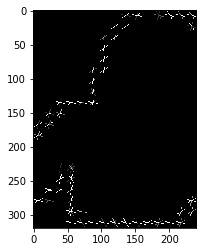

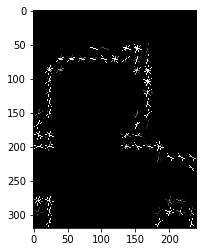

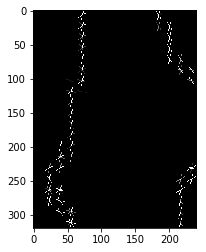

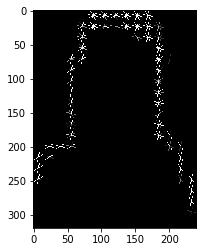

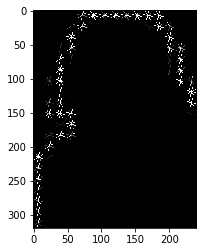

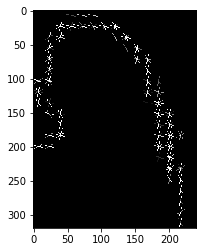

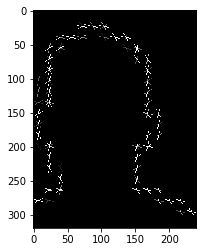

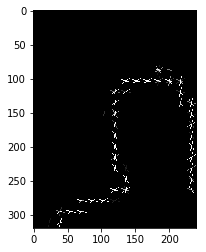

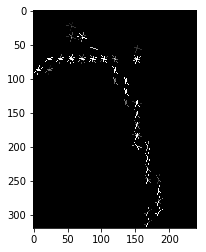

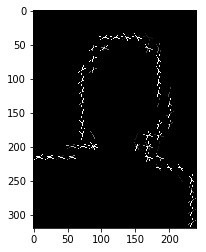

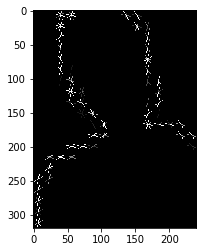

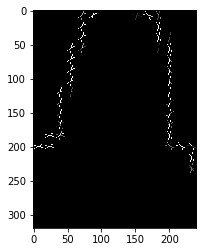

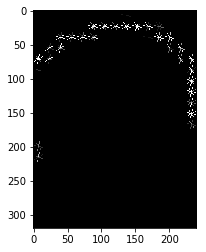

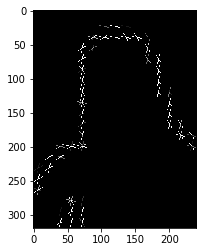

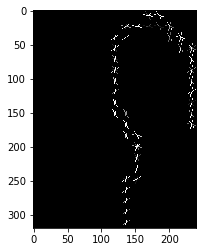

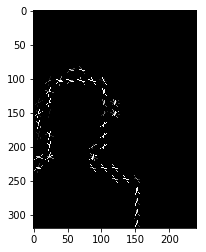

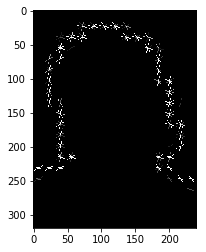

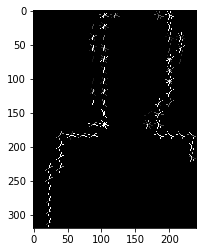

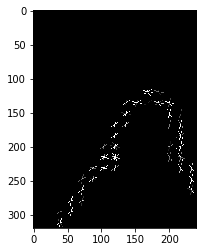

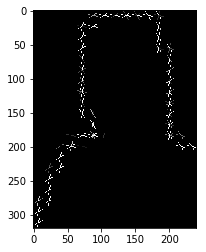

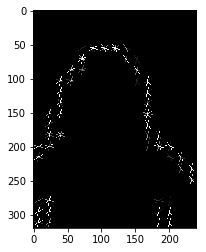

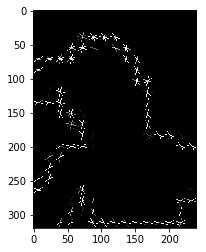

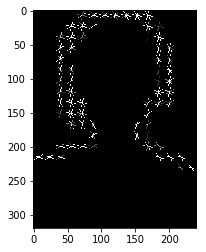

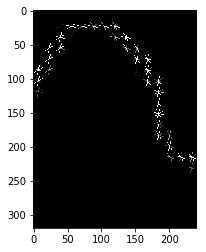

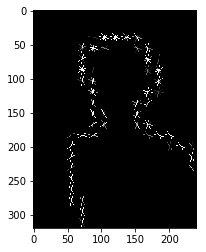

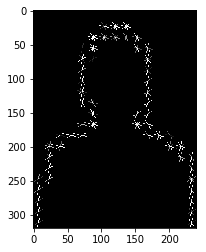

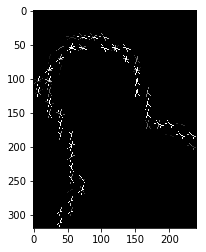

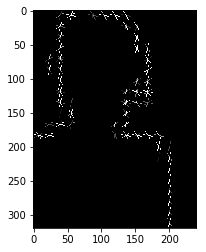

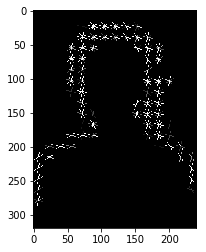

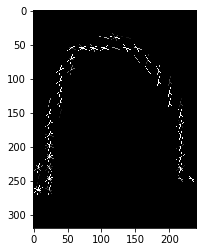

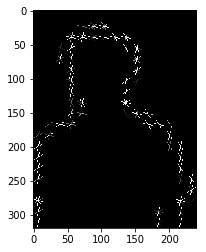

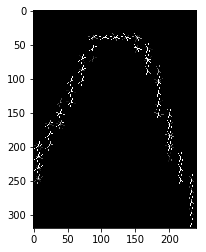

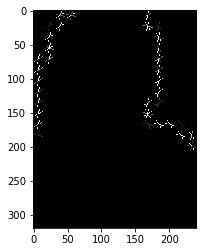

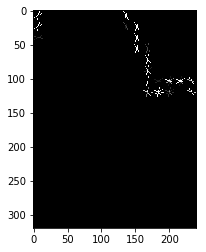

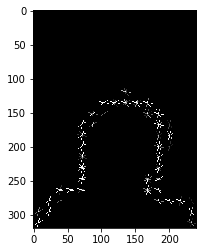

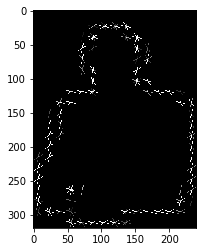

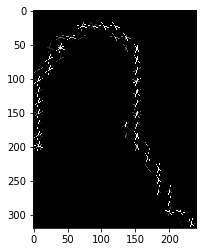

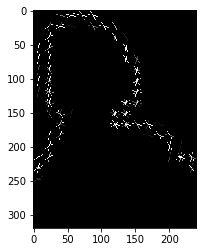

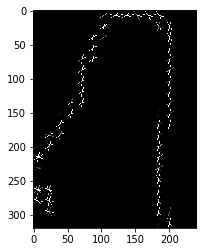

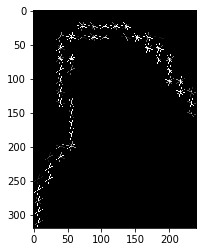

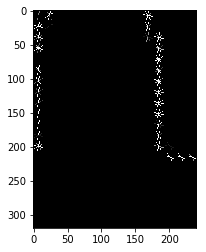

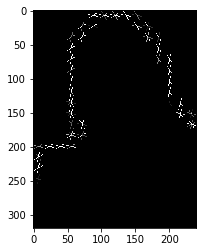

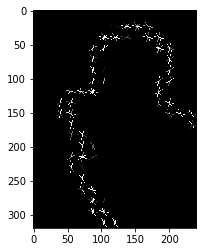

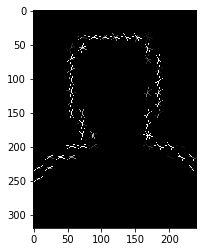

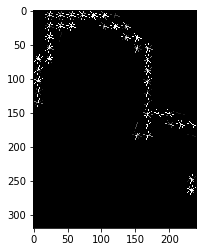

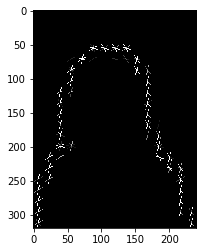

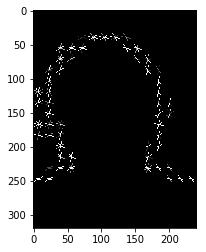

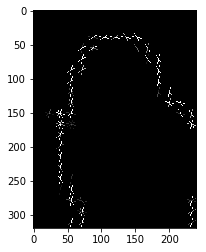

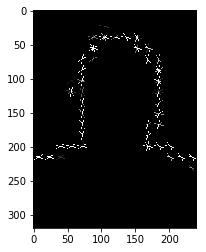

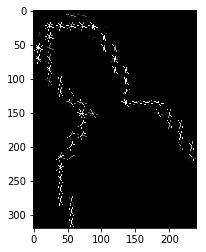

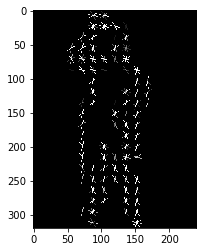

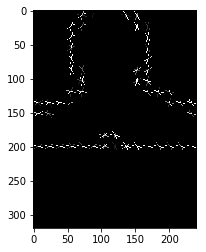

In [11]:
for a in train_mask[0:190]:
    train_mask_img = cv2.imread("train_mask/{}".format(a))
    fd, hog_image = hog(train_mask_img, orientations=8, pixels_per_cell=(16, 16),cells_per_block=(1, 1),block_norm='L2-Hys', visualize=True, multichannel=True)
    hog_image_rescaled2 = exposure.rescale_intensity(hog_image, in_range=(0, 10))
    plt.imshow(hog_image_rescaled2, cmap=plt.cm.gray)
    plt.show()       
    images['train_mask'].append(hog_image_rescaled2.ravel())
    images['train_mask_path'].append(a)

In [12]:
X = np.asarray(images['train_images'])
Y = np.asarray(images['train_mask'])
M = np.array(images['train_mask_path'])

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, M, random_state=0)
mlp = MLPClassifier(solver='lbfgs', hidden_layer_sizes=10,
                    alpha=0.1, activation="relu",
                    learning_rate_init=1, random_state=0)

mlp.fit(X_train, y_train)
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

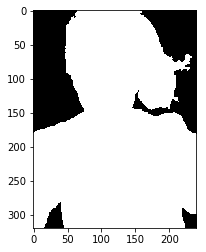

1.0


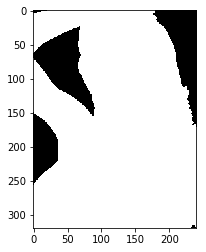

In [14]:
input_image = cv2.imread("train_mask/{}".format(M[0]))
plt.imshow(input_image)
plt.show()
predict = mlp.predict([Y[2]])
print(mlp.score(X_train,y_train))
pred_img = cv2.imread("train_mask/{}".format(predict[0]))
plt.imshow(pred_img)
plt.show()

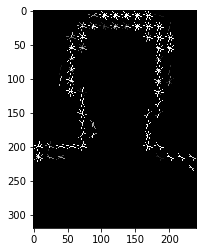

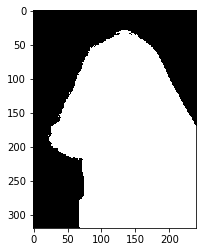

In [15]:
predict_img = cv2.imread("train_mask/{}".format(M[1]))
fd, hog_image = hog(predict_img, orientations=8, pixels_per_cell=(16, 16),cells_per_block=(1, 1),block_norm='L2-Hys', visualize=True, multichannel=True)
hog2 = exposure.rescale_intensity(hog_image, in_range=(0, 10))
plt.imshow(hog2, cmap=plt.cm.gray)
plt.show() 
predict = mlp.predict([hog2.ravel()])
pred_img = cv2.imread("train_mask/{}".format(predict[0]))
plt.imshow(pred_img)
plt.show()

In [16]:
hog2

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])